# Teamb小テスト(機械学習を用いたHousePriceデータの分析)

##### 今回はKaggleというデータ分析コンテストのチュートリアル教材のHousePriceというデータセットを用いて、簡単なデータ分析の流れを理解してもらう課題にしたいと思います。

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### まずは上のリンク先にあるKaggleのページから、データセットのダウンロードをしてください。初回はユーザー登録が必要です。

ダウンロードをしたらこのノートブックファイルと同じディレクトリに配置してください。今回は練習のためtrain.csvのみを用います。

# データ分析の大まかな流れ

##### 1. まずはデータをしっかりと観察する。どのような情報がデータとして与えられているか。特徴量や予測する目標をしっかりと確認する。

##### 2. 予測に扱えそうな特徴量に目星をつける。数字の並びのみを見ても検討があまりつかないので、可視化して見たり、様々な値を出して見て判断する。

##### 3.必要に応じて欠損のあるデータを補間する。(前処理)

##### 4. 学習させる。手法などは各自でどれがいいのか考えて、色々試して見てください。

##### 5.学習させたモデルの性能評価。得られた結果が何を示しているのかしっかりと考察して見てください。

##### 6. モデルの精度向上に何が必要なのか考え、色々試して見てください。(新たな特徴量を作るなど)

# 実際にやって見ましょう

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head() #データの観察を行う

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 本来は欠損値を処理するなどして、データ分析を進めますが今回は範囲外なので、欠損値がないデータのみを利用します

In [5]:
data.corr() #今回は練習なのでとりあえず、相関係数を利用して特徴量を選択する

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [6]:
data.corr()["SalePrice"].sort_values() #見にくかったので、予測したい値についての相関係数のみを取り出す(ついでにソートもしました)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [7]:
data.isnull().sum().sort_values() #とりあえず欠損値も確認(欠損値があると学習することができません、また今回は練習のため欠損値のない特徴量を使いますが、欠損値を何かに値を補間して利用することも精度向上に必要な場合があります)

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
                 ... 
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
MSSubClass          0
YearRemodAdd        0
Utilities           0
Electrical          1
MasVnrType          8
MasVnrArea          8
BsmtQual  

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.loc[:,['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF']].values.astype('float64') #今回は単純に相関係数が高い順に6つ利用して見る
y = data.loc[:, ['SalePrice']].values.astype('float64')
ss = StandardScaler()
X_std = ss.fit_transform(X) #　正規化する
y_std = ss.fit_transform(y) #　正規化する
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.25, random_state = 0) # trainと　testデータを分割

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr_std = LinearRegression() 
lr_std.fit(X_train,y_train) # 実際に学習させる。今回は線形回帰でやって見る
print(mse(y_train,lr_std.predict(X_train))**(1/2)) 
print(mse(y_test,lr_std.predict(X_test))**(1/2))
print('train RMSE:%.3f'%(mse(y_train, lr_std.predict(X_train)) ** (1/2))) # 精度評価にはRMSEを今回は使う
print('test RMSE:%.3f'%(mse(y_test, lr_std.predict(X_test)) ** (1/2)))

0.45824907875318344
0.5839478136247689
train RMSE:0.458
test RMSE:0.584


In [10]:
print(lr_std.coef_) #偏回帰係数を確認する。

[[0.39167938 0.31525189 0.06208699 0.11294184 0.19058963 0.04684496]]


##### このあとは精度向上するために色々試して見てください。

##### 今回は練習のために適切ではない、処理をしたりしていることもあります。なるべく簡単に結果を出すまでの流れを確認しました。

## おまけ seabornで色々可視化して見てね 今回は単純にグラフの出し方の参考なので、変数の選び方、用いるグラフの種類に関しては参考にしないでください

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df_pickup = data.loc[:,['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF', "SalePrice"]]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


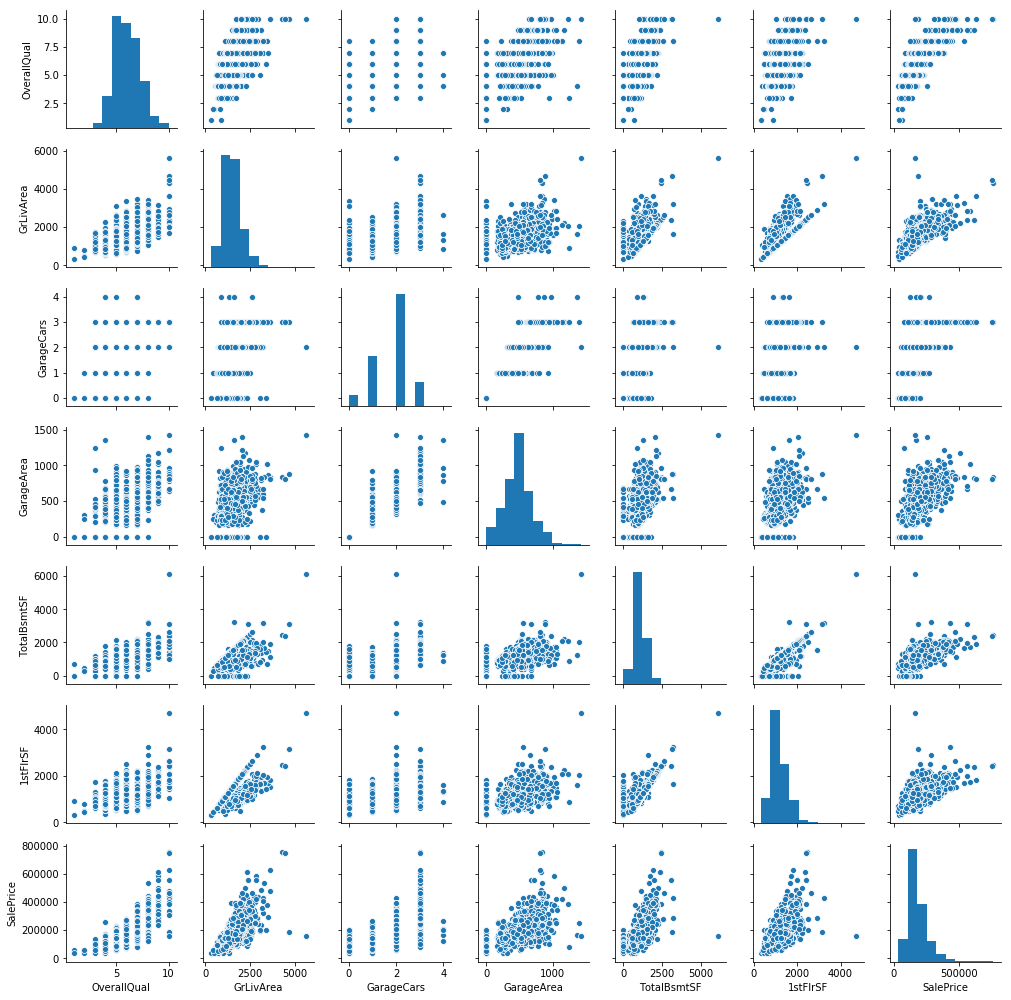

In [13]:
sns.pairplot(df_pickup, size=2.0)
plt.show()

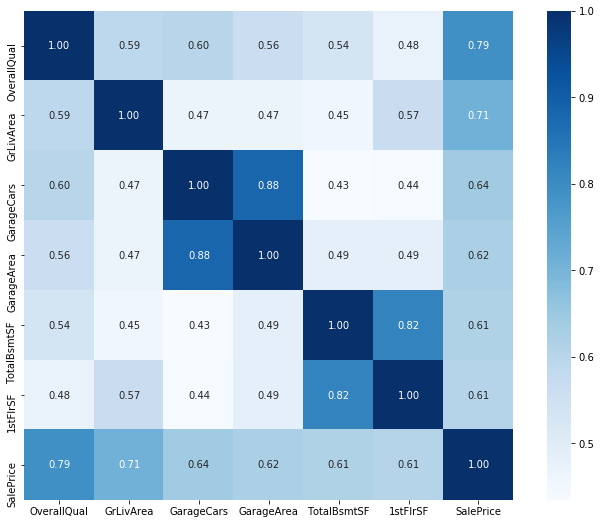

In [14]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_pickup.corr(), annot=True, square=True, fmt='.2f', cmap="Blues") #ヒートマップ　　色とかも変えられるよ
plt.show()

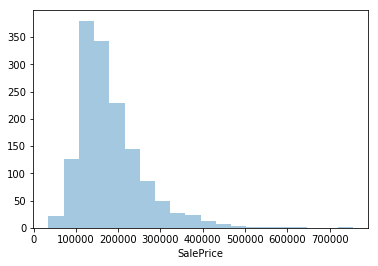

In [15]:
sns.distplot(data["SalePrice"], kde=False, rug=False, bins=20) #ヒストグラム

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


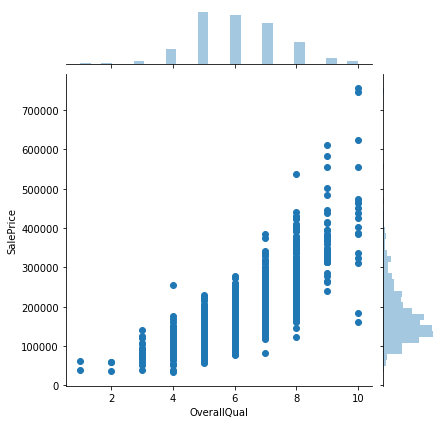

In [16]:
sns.jointplot('OverallQual', 'SalePrice', data=data) #散布図とヒストグラムが出るよ

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


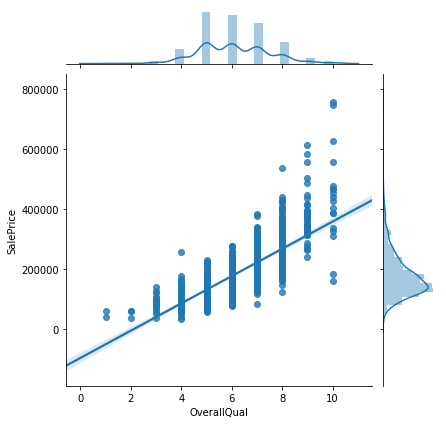

In [17]:
sns.jointplot('OverallQual', 'SalePrice', data=data, kind="reg") #kindを色々いじると回帰直線とかも出せるよ(他にも調べて見てね)

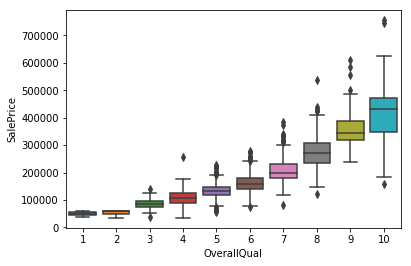

In [18]:
sns.boxplot(x="OverallQual", y="SalePrice", data=data) #箱ひげ図とかも出せるよ

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


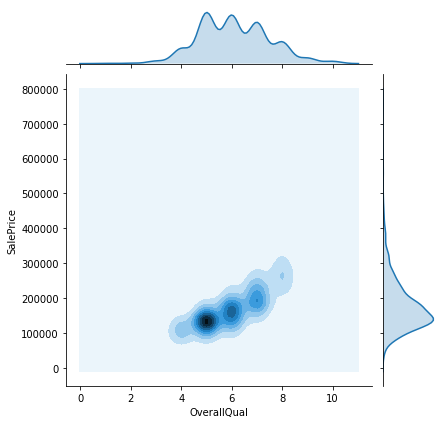

In [19]:
sns.jointplot('OverallQual', 'SalePrice', data=data, kind="kde") #等高線とかも出せるよ